In [48]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.models as models

In [2]:
# df = pd.read_excel('/home/hyungyu/survival_analysis/paper_ex/new_data_0818.xlsx')
# df = df.drop(columns=['Unnamed: 0','D_date','pic_date'])
# df


In [50]:
from PIL import Image
from PIL.ExifTags import TAGS

img_path = df['file_path']

def get_exif_data(image_path):
    img = Image.open(image_path)
    exif_data = img._getexif()
    if exif_data is not None:
        for tag, value in exif_data.items():
            tag_name = TAGS.get(tag, tag)
            print(f"{tag_name}: {value}")

In [3]:
# img_path[0]

In [52]:
get_exif_data(img_path[0])

PrintImageMatching: b'PrintIM\x000300\x00\x00\x03\x00\x02\x00\x01\x00\x00\x00\x03\x00"\x00\x00\x00\x01\x01\x00\x00\x00\x00\t\x11\x00\x00\x10\'\x00\x00\x0b\x0f\x00\x00\x10\'\x00\x00\x97\x05\x00\x00\x10\'\x00\x00\xb0\x08\x00\x00\x10\'\x00\x00\x01\x1c\x00\x00\x10\'\x00\x00^\x02\x00\x00\x10\'\x00\x00\x8b\x00\x00\x00\x10\'\x00\x00\xcb\x03\x00\x00\x10\'\x00\x00\xe5\x1b\x00\x00\x10\'\x00\x00'
ResolutionUnit: 2
ExifOffset: 364
ImageDescription:                                
Make: SONY
Model: ILCE-6000
Software: ILCE-6000 v3.21
Orientation: 1
DateTime: 2021:10:12 15:56:46
YCbCrPositioning: 2
XResolution: 350.0
YResolution: 350.0
ExifVersion: b'0230'
ComponentsConfiguration: b'\x01\x02\x03\x00'
CompressedBitsPerPixel: 1.0
DateTimeOriginal: 2021:10:12 15:56:46
DateTimeDigitized: 2021:10:12 15:56:46
BrightnessValue: 3.09921875
ExposureBiasValue: 0.0
MaxApertureValue: 3.6171875
MeteringMode: 5
LightSource: 0
Flash: 16
FocalLength: 16.0
UserComment: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [53]:
list_img_path = list(img_path)
    

In [54]:
def get_camera_info(image_path):
    img = Image.open(image_path)
    exif_data = img.getexif()
    camera_info = {}
    if exif_data is not None:
        for tag, value in exif_data.items():
            tag_name = TAGS.get(tag, tag)
            if tag_name in ['Model', 'Make', 'Software']:
                camera_info[tag_name] = value
    return camera_info

camera_info_list = []

In [ ]:
camera_info_df

,Make,Model,Software
0,SONY,ILCE-6000,ILCE-6000 v3.21
1,SONY,ILCE-6000,ILCE-6000 v3.21
2,SONY,ILCE-6000,ILCE-6000 v3.21
3,Apple,iPhone 12 mini,14.4.2
4,SONY,ILCE-6000,ILCE-6000 v3.21
...,...,...,...
882,SONY,ILCE-6000,ILCE-6000 v3.21
883,SONY,ILCE-6000,ILCE-6000 v3.21
884,SONY,ILCE-6000,ILCE-6000 v3.21
885,SONY,ILCE-6000,ILCE-6000 v3.21


In [ ]:
camera_info = camera_info_df['Make'].unique()
model_info = camera_info_df['Model'].unique()
software_info = camera_info_df['Software'].unique()


print("Camera:", camera_info)
print("Models:", model_info)
print("Softwares:", software_info)

Camera: ['SONY' 'Apple' 'samsung' 'NIKON CORPORATION' nan]
Models: ['ILCE-6000' 'iPhone 12 mini' 'SM-A205S' 'ILCE-6400' 'NIKON D750'
 'SM-A605K' 'iPhone 11 Pro' nan 'SM-G991N' 'SM-P610']
Softwares: ['ILCE-6000 v3.21' '14.4.2' 'A205SKSU3ATA1' 'ILCE-6400 v2.00' 'Ver.1.10 '
 'A605KKKU3CVB1' 'Windows Photo Editor 10.0.10011.16384' '15.0.2' '14.6'
 'Ver.1.15 ' 'G991NKSS3AUIN' 'P610XXU2DUK1']


In [ ]:
from datetime import datetime

def get_exif_date(image_path):
    img = Image.open(image_path)
    exif_data = img.getexif()
    if exif_data is not None:
        for tag, value in exif_data.items():
            tag_name = TAGS.get(tag, tag)
            if tag_name == 'DateTime':
                return value
    return None

In [ ]:
date_list = []
for path in df['file_path']:
    date_time = get_exif_date(path)
    if date_time is not None:
        date_list.append(datetime.strptime(date_time, '%Y:%m:%d %H:%M:%S'))

print("Earliest photo taken on :", min(date_list))
print("Latest photo taken on :", max(date_list))

Earliest photo taken on : 2021-05-23 20:01:08
Latest photo taken on : 2022-12-13 09:56:54


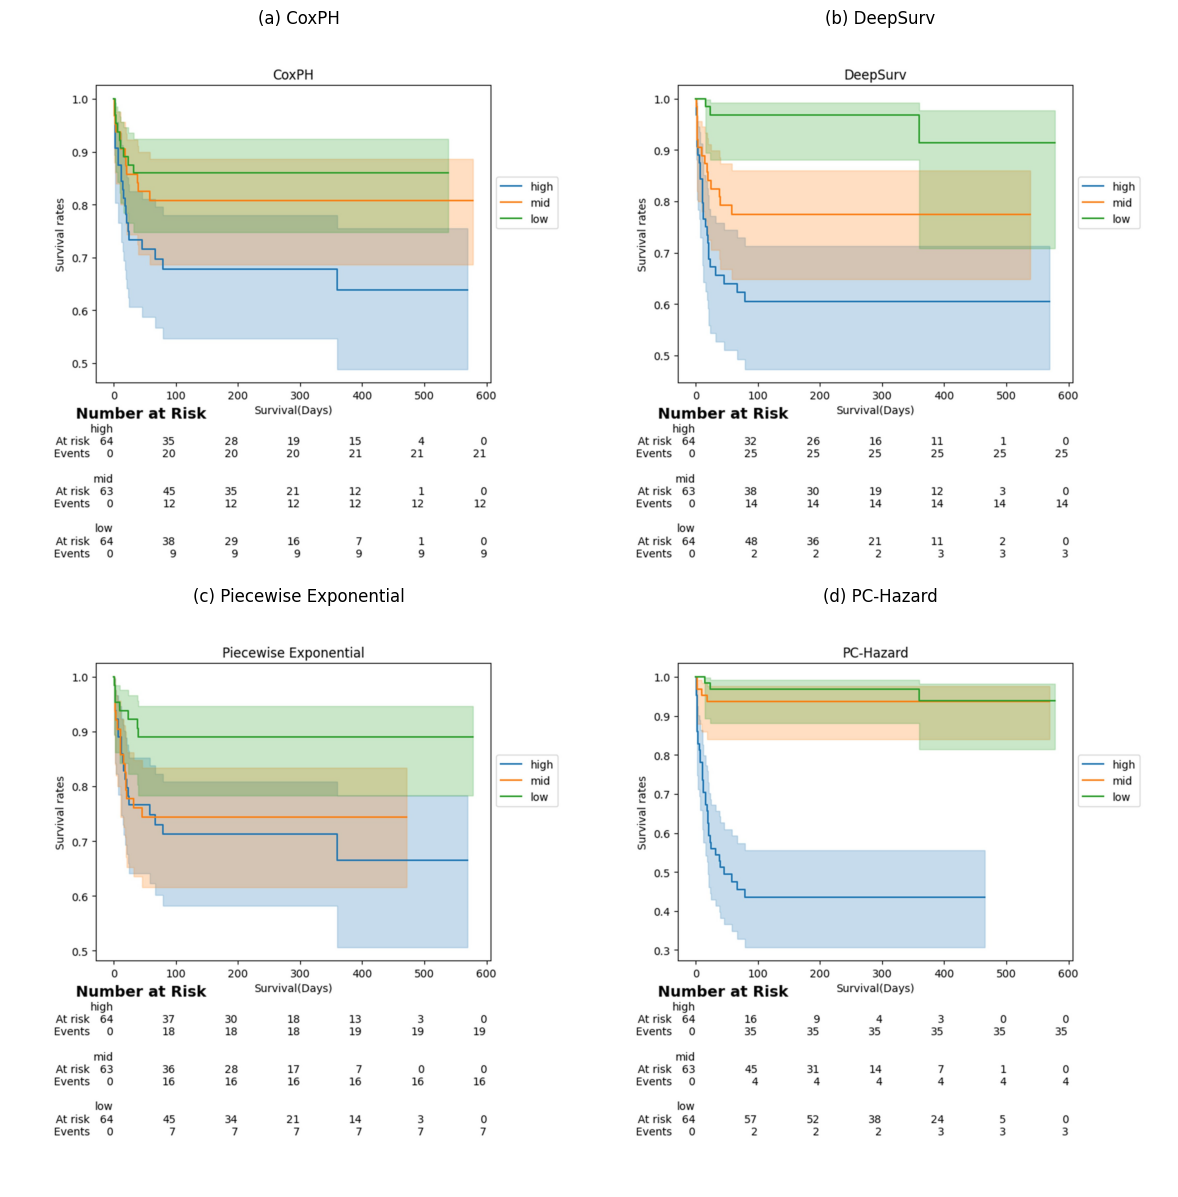

In [59]:
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로
img_path1 = '/home/hyungyu/survival_analysis/paper_ex/CoxPH_0.05.jpg'
img_path2 = '/home/hyungyu/survival_analysis/paper_ex/DeepSurv_0.05.jpg'
img_path3 = '/home/hyungyu/survival_analysis/paper_ex/PW-ExP_0.05.jpg'
img_path4 = '/home/hyungyu/survival_analysis/paper_ex/PC_hazard_0.05.jpg'

# 이미지 파일 열기
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)
img3 = Image.open(img_path3)
img4 = Image.open(img_path4)

# 이미지 크기 조정 (선택 사항)
# img1 = img1.resize((200, 200))
# img2 = img2.resize((200, 200))
# img3 = img3.resize((200, 200))
# img4 = img4.resize((200, 200))

fig, axs = plt.subplots(2, 2, figsize=(15, 15))  # 그림 크기를 15x15로 조정
axs[0, 0].imshow(img1)
axs[0, 0].set_title('(a) CoxPH')  # [0, 0] 이미지 제목 설정
axs[0, 1].imshow(img2)
axs[0, 1].set_title('(b) DeepSurv')  # [0, 1] 이미지 제목 설정
axs[1, 0].imshow(img3)
axs[1, 0].set_title('(c) Piecewise Exponential')  # [1, 0] 이미지 제목 설정
axs[1, 1].imshow(img4)
axs[1, 1].set_title('(d) PC-Hazard')  # [1, 1] 이미지 제목 설정


# 축 제거
for ax in axs.flat:
    ax.axis('off')

plt.subplots_adjust(wspace=0.001, hspace=0.001)

plt.show()
